# CS 4650 - Capstone Project

### Jeremy Embar, Timothy Huang, Michael Left, Dante Martinez
### Cal Poly Pomona 2023-05-11

Analyzing Boston Marathon Winners

### Necessary imports and settings

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import sklearn as sk
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

import matplotlib.pyplot as plt
import matplotlib.cm as cm

pd.set_option('display.max_columns', 50)
np.set_printoptions(precision=4, suppress=True)

### Loading the data
Loading the data for both men and women into dataframes.

In [3]:
data_m = pd.read_csv('Mens_Boston_Marathon_Winners.csv')
data_f = pd.read_csv('Womens_Boston_Marathon_Winners.csv')

In [4]:
data_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              124 non-null    float64
 1   Winner            124 non-null    object 
 2   Country           124 non-null    object 
 3   Time              124 non-null    object 
 4   Distance (Miles)  124 non-null    float64
 5   Distance (KM)     124 non-null    float64
dtypes: float64(3), object(3)
memory usage: 6.0+ KB


In [5]:
data_m.tail()

,Year,Winner,Country,Time,Distance (Miles),Distance (KM)
121,2018.0,Yuki Kawauchi,Japan,02:15:58,26.2,42.2
122,2019.0,Lawrence Cherono,Kenya,02:07:57,26.2,42.2
123,NaN,NaN,NaN,NaN,NaN,NaN
124,2021.0,Benson Kipruto,Kenya,02:09:51,26.2,42.2
125,2022.0,Evans Chebet,Kenya,02:06:51,26.2,42.2


Checking for NaN values and dropping the rows that are missing.

In [6]:
data_m['Year'].isna().sum()

2

In [7]:
data_f['Year'].isna().sum()

1

Dropping all the NaN values from the Men and Womens marathon tables.

In [8]:
data_m.dropna(inplace=True)
data_f.dropna(inplace=True)

Creating a new column for Speed (MPH) and calculating those values

In [9]:

data_m['Speed (MPH)'] = pd.to_datetime(data_m['Time'], format= '%H:%M:%S')
data_m['Speed (MPH)'] = data_m['Speed (MPH)'].dt.hour + data_m['Speed (MPH)'].dt.minute/60 + data_m['Speed (MPH)'].dt.second/3600
data_m['Speed (MPH)'] = data_m['Distance (Miles)'] / data_m['Speed (MPH)']

In [10]:
data_f['Speed (MPH)'] = pd.to_datetime(data_f['Time'], format= '%H:%M:%S')
data_f['Speed (MPH)'] = data_f['Speed (MPH)'].dt.hour + data_f['Speed (MPH)'].dt.minute/60 + data_f['Speed (MPH)'].dt.second/3600
data_f['Speed (MPH)'] = data_f['Distance (Miles)'] / data_f['Speed (MPH)']

Dropping the Distance in KMs because it is redundant when we already have the Distance in miles

In [11]:
data_m.drop('Distance (KM)', axis = 1, inplace=True)
data_f.drop('Distance (KM)', axis = 1, inplace=True)

In [12]:
data_f.tail()

,Year,Winner,Country,Time,Distance (Miles),Speed (MPH)
51,2017.0,Edna Kiplagat,Kenya,2:21:52,26.2,11.080827
52,2018.0,Desiree Linden,United States,2:39:54,26.2,9.831144
53,2019.0,Worknesh Degefa,Ethiopia,2:23:31,26.2,10.953432
55,2021.0,Edna Kiplagat,Kenya,2:25:09,26.2,10.830176
56,2022.0,Peres Jepchirchir,Kenya,2:21:02,26.2,11.146301


### Plotting Male vs Female Speeds Over Time

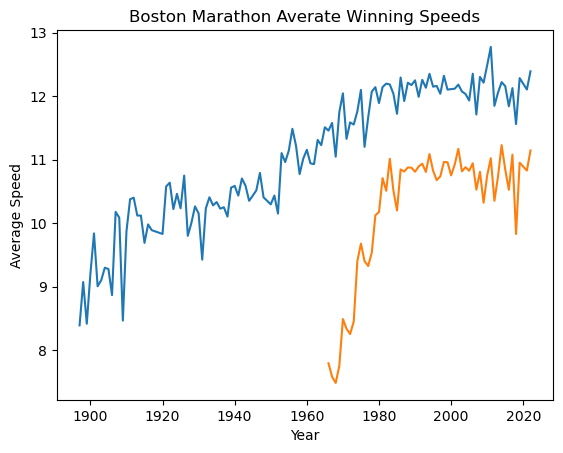

In [13]:
# Create line plot for male winners
sns.lineplot(x='Year', y='Speed (MPH)', data=data_m)

# Create line plot for female winners
sns.lineplot(x='Year', y='Speed (MPH)', data=data_f)

# Set plot title and axis labels
plt.title('Boston Marathon Averate Winning Speeds')
plt.xlabel('Year')
plt.ylabel('Average Speed')

# Show the plot
plt.show()


### Plotting Repeat Winners Over Time

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


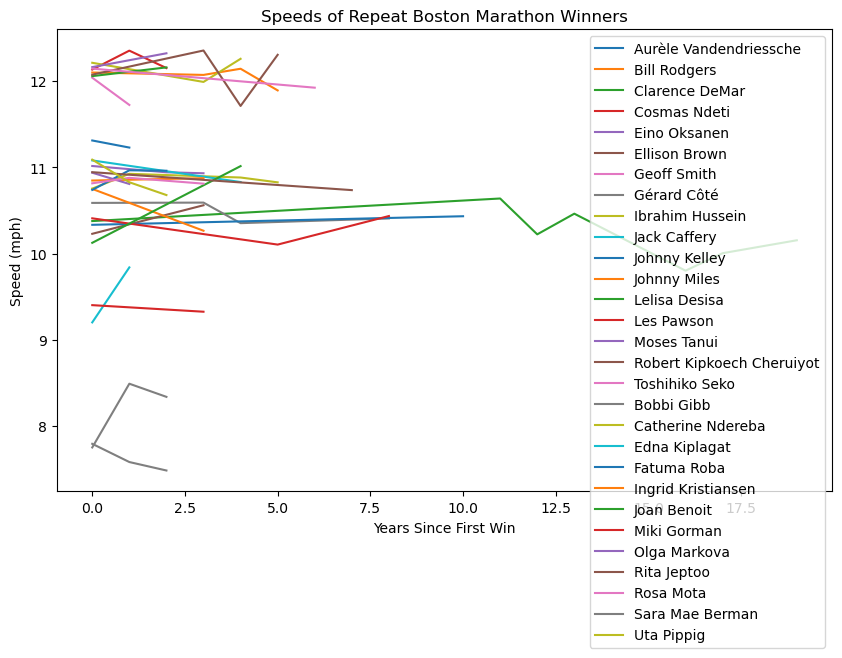

In [14]:
#winners = pd.concat([data_m, data_f])
data_f["years_since_first_win"] = data_f.groupby("Winner")["Year"].transform(lambda x: x - x.min())

data_m["years_since_first_win"] = data_m.groupby("Winner")["Year"].transform(lambda x: x - x.min())

repeat_winners_m = data_m.groupby("Winner").filter(lambda x: len(x) > 1)
repeat_winners_f = data_f.groupby("Winner").filter(lambda x: len(x) > 1)

plt.figure(figsize=(10, 6))
plt.legend(loc="upper left", fontsize=8)

for name, group in repeat_winners_m.groupby("Winner"):
    plt.plot(group["years_since_first_win"], group["Speed (MPH)"], label=name)
for name, group in repeat_winners_f.groupby("Winner"):
    plt.plot(group["years_since_first_win"], group["Speed (MPH)"], label=name)
plt.xlabel("Years Since First Win")
plt.ylabel("Speed (mph)")
plt.title("Speeds of Repeat Boston Marathon Winners")
plt.legend()
plt.show()

### Plotting Speeds Overtime In Each Country

In these dataset for marathon runners we can look at the average speed ran by each winning marathon winner. By analyzing these datasets for men and women we can look at how the average varies across countries over time. One way to visualize this data is by using a line plot, where the x-axis represents the year and the y-axis represents the average speed. By plotting each country's average speed over time, we can observe the trends and changes in each country's athletic performance. This can be useful for identifying countries that have consistently high or low average speeds, as well as for tracking changes in performance over time.

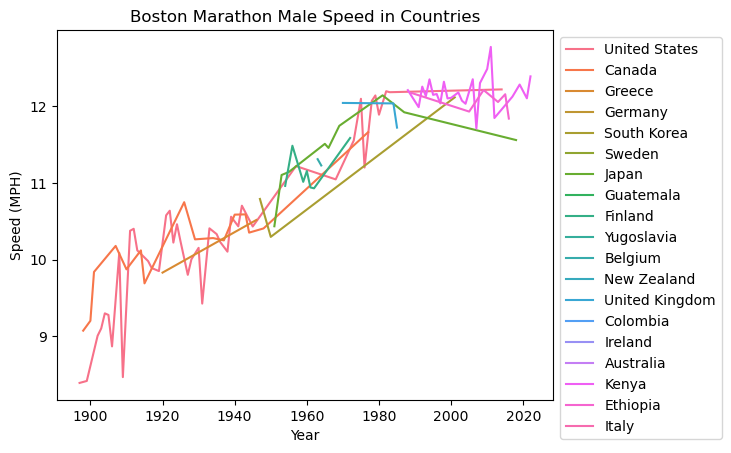

In [15]:
sns.lineplot(x='Year', y='Speed (MPH)', hue='Country', data=data_m)
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.title('Boston Marathon Male Speed in Countries')
plt.xlabel('Year')
plt.ylabel('Speed (MPH)')

plt.show()


Due to some differences in certain Boston Marathon years having slightly shorter marathons before the standard 26.2 miles, we will be looking at the average speed in miles per hour of the marathoners. In this line plot, while there are some dips in speed, we can see a general trend over the years with an increase in average speed for male marathoner. 

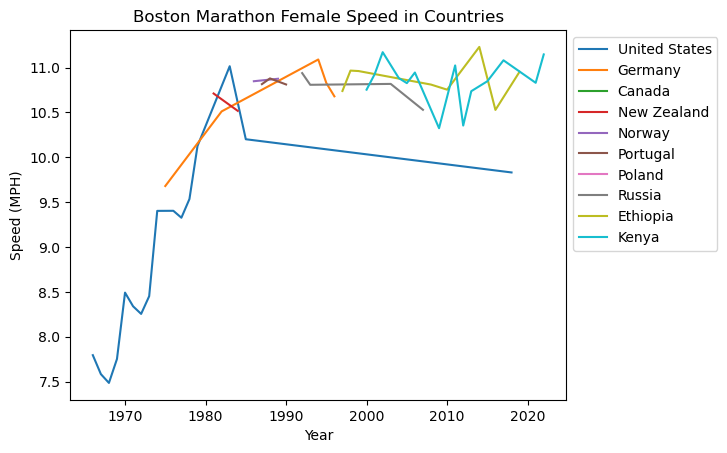

In [16]:
sns.lineplot(x='Year', y='Speed (MPH)', hue='Country', data=data_f)
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.title('Boston Marathon Female Speed in Countries')
plt.xlabel('Year')
plt.ylabel('Speed (MPH)')

plt.show()

While the Boston Marathon data for female marathoners began on 1966, we can still an overall increase in speed in female marathoners. The plot also shows a strong presence for marathoners from the United States winning until the 1990s.

### Boxplot of Boston Marathon Countries and Their Speed

Another way to analyze the speed of marathon runners in each country is to visualize the distribution of speeds using a blox plot. We can see where the median of the marathoner's speeds are and if there are any outliers that can be seen. 

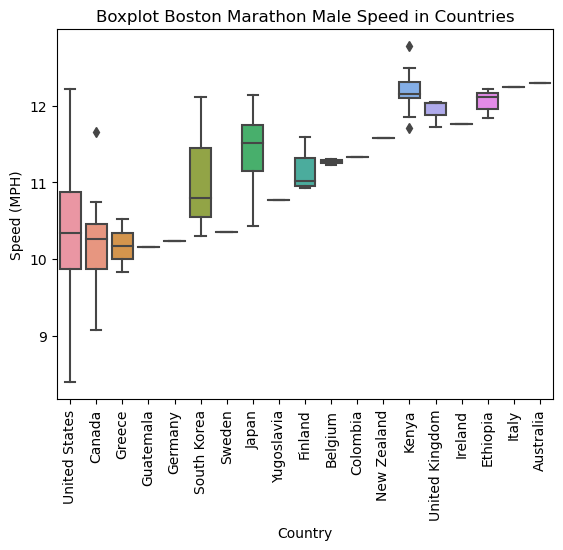

In [17]:
speed_sorted_m = data_m.sort_values('Speed (MPH)')
sns.boxplot(x='Country', y='Speed (MPH)', data=speed_sorted_m)
plt.title('Boxplot Boston Marathon Male Speed in Countries')
plt.xticks(rotation=90)

plt.show()

Looking at the boxplot we can see that certain countries have a much larger box. This box helps us understand the median of marathoner's speeds as well as seeing the slowest and fastest marathon runners in each country.

Because the United States has participated since the first Boston Marthon in 1897 and has won the most marathons, they have the largest box and whiskers due to different results from many marathoners. Another box we can look at is in Kenya, which shows that they have won many marathons with a very high median speed, and an outlier point showing the fastest speed and time ever recorded in the Boston Marathon.

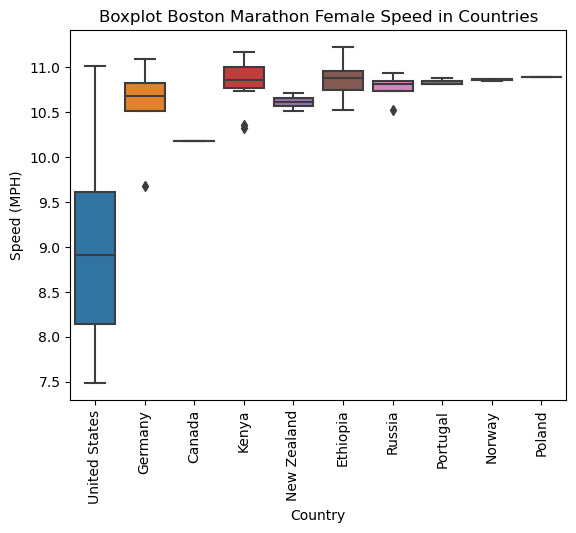

In [18]:
speed_sorted_f = data_f.sort_values('Speed (MPH)')
sns.boxplot(x='Country', y='Speed (MPH)', data=speed_sorted_f)
plt.title('Boxplot Boston Marathon Female Speed in Countries')
plt.xticks(rotation=90)

plt.show()

Looking at the women's marathon, we can see a similar United States box to the men's marathon which signifies long participation and winning in the Boston marathon and large variance between the slowest and fastest female marathoner's speed. We can also see based on Ethiopia's box and whisker that they have the fastest recorded speed and time for females in the Boston Marathon.